In [256]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
  
from sklearn.cluster import DBSCAN 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA
import seaborn as sn
from sklearn.manifold import TSNE

## PCA

In [257]:
DATA = os.path.join("customer_segmentation_data", "df_test_normalised.csv")
df_data = pd.read_csv(DATA)

df_data = df_data.drop("Var_1", axis=1)

In [258]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_data)

In [259]:
data_normalised = normalize(data_scaled)
data_normalised = pd.DataFrame(data_normalised, columns=df_data.columns)

data_normalised.head()

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,Profession_Entertainment,Profession_Executive,Profession_Healthcare,Profession_Homemaker,Profession_Lawyer,Profession_Marketing,Spending_Score_Average,Spending_Score_High,Spending_Score_Low
0,-0.379317,0.243046,0.183296,-0.100738,0.175276,-0.180181,-0.269682,-0.153159,-0.071159,0.711050,-0.080361,-0.059862,-0.097175,-0.040099,-0.067704,-0.046922,-0.124817,-0.092713,0.176694
1,-0.379105,-0.205442,0.183400,-0.087619,0.175375,0.384737,0.171820,-0.153246,-0.071199,-0.070223,-0.080406,-0.059896,0.513833,-0.040121,-0.067742,-0.046948,0.400040,-0.092765,-0.282590
2,-0.442283,0.283838,0.214060,0.389859,-0.332500,-0.210422,-0.314945,0.380514,-0.083102,-0.081962,-0.093848,-0.069909,-0.113485,-0.046829,-0.079067,-0.054797,-0.145766,-0.108273,0.206349
3,-0.278250,-0.150991,0.134791,0.148650,-0.209372,0.438490,-0.090118,-0.112629,-0.052328,-0.051611,-0.059095,0.613041,-0.071460,-0.029487,-0.049788,-0.034505,-0.091787,0.395824,-0.207692
4,-0.286957,0.184365,-0.206523,-0.246233,-0.215972,0.000000,0.130262,-0.116180,-0.053978,-0.053238,-0.060958,-0.045409,-0.073713,-0.030417,-0.051357,0.806769,-0.094681,-0.070328,0.134032


In [260]:
pca = PCA(n_components=2)
data_principal = pca.fit_transform(data_normalised)
data_principal = pd.DataFrame(data_principal)
data_principal.columns = ["P1", "P2"]

data_principal

,P1,P2
0,-0.030427,0.102836
1,0.060589,-0.271079
2,0.189718,0.354697
3,0.193212,-0.397935
4,-0.388253,-0.045308
...,...,...
2622,-0.687076,-0.180373
2623,-0.259925,0.167228
2624,-0.186781,0.074893
2625,0.253759,-0.501942


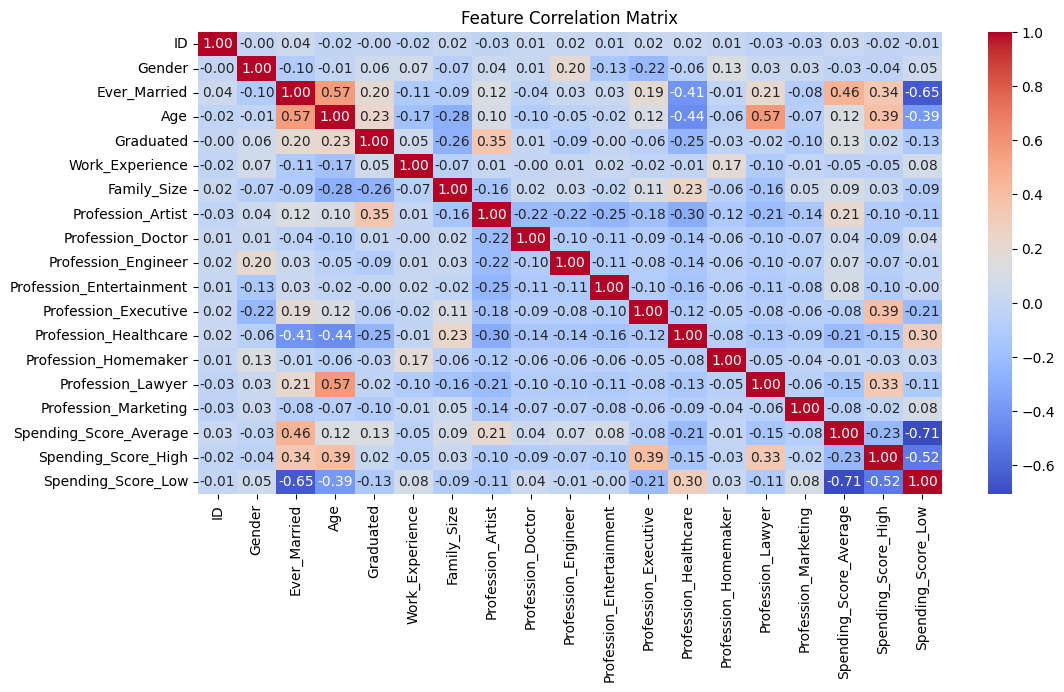

In [261]:
plt.figure(figsize=(12, 6))
sns.heatmap(df_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

We pick age / ever_married columns for segmentation as they have highest score and we can visualise 2 dimentionality

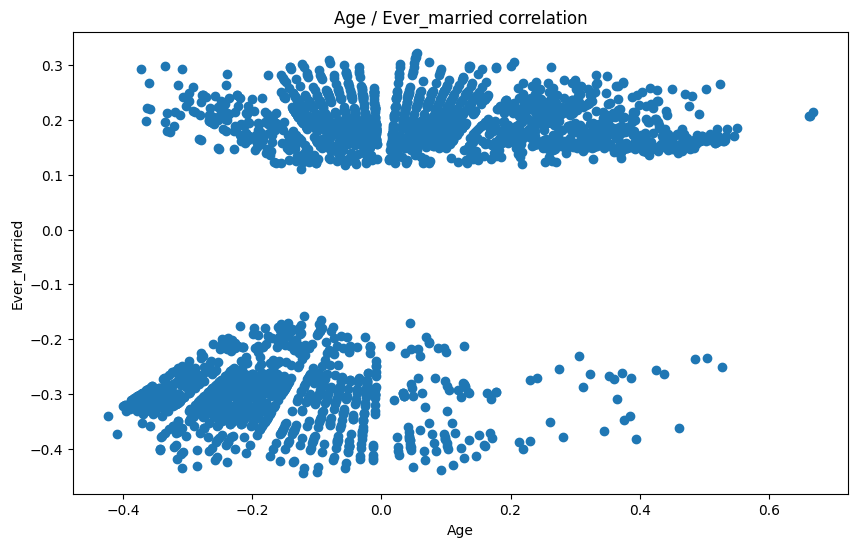

In [262]:
plt.figure(figsize=(10, 6))
plt.scatter(data_normalised["Age"], data_normalised["Ever_Married"])
plt.title('Age / Ever_married correlation')
plt.xlabel('Age')
plt.ylabel('Ever_Married')
plt.show()

## Segmentation with DBSCAN

In [263]:
dbscan = DBSCAN(eps=0.2, min_samples=2)
clusters = dbscan.fit_predict(data_normalised)

data_normalised['Cluster'] = clusters

In [264]:
data_normalised['Cluster'].max()

np.int64(270)

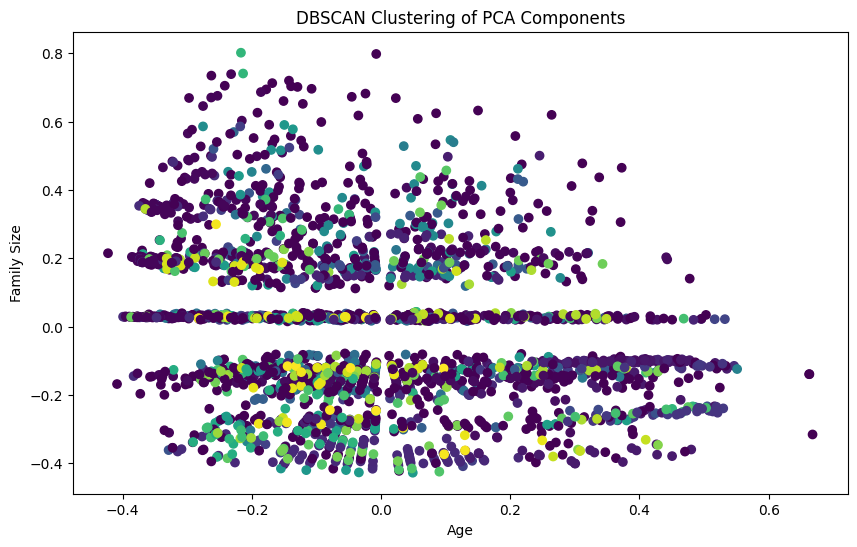

In [265]:
plt.figure(figsize=(10, 6))
plt.scatter(data_normalised['Age'], data_normalised['Family_Size'], c=data_normalised['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering of PCA Components')
plt.xlabel('Age')
plt.ylabel('Family Size')
plt.show()

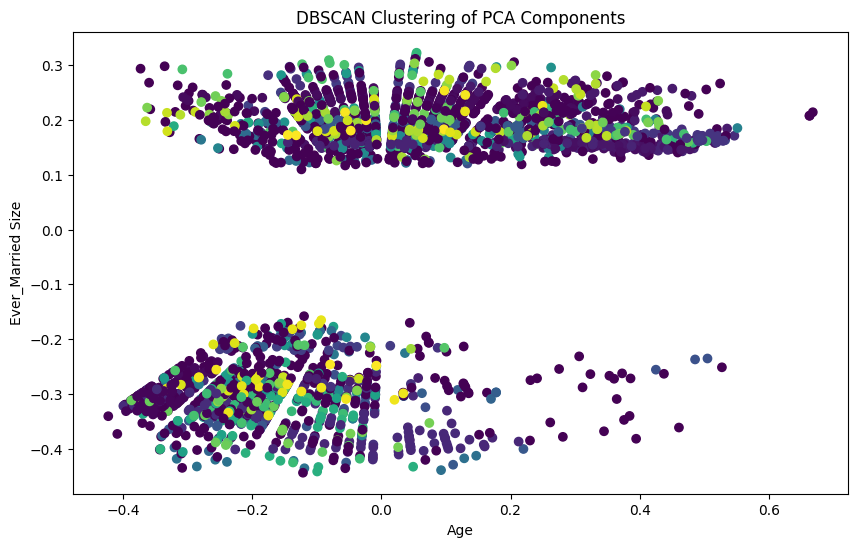

In [266]:
plt.figure(figsize=(10, 6))
plt.scatter(data_normalised['Age'], data_normalised['Ever_Married'], c=data_normalised['Cluster'], cmap='viridis')
plt.title('DBSCAN Clustering of PCA Components')
plt.xlabel('Age')
plt.ylabel('Ever_Married Size')
plt.show()